 ## 야채 가격(2023.01 - 2024.01)
야채 가격의 포괄적인 데이터 세트: 시계열 분석
- kdeplot: kernal density estimation: 커널 밀도 추정 그래프
  - 비율(상대량)을 시각화하는 그래프

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/ksamiksha19/vegetable-prices/prices.csv')

In [3]:
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [6]:
df.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [8]:
df.isna().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [9]:
df.shape

(287, 11)

In [27]:
df.columns

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)', 'month'],
      dtype='object')

In [31]:
df.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
month                      object
dtype: object

1. 월별 인덱스 생성
2. convert 함수
   1. date 변수: '01-01-2024' 형식의 문자열 데이터를 datetime 형식으로 변환 -> 해당 월의 인덱스(해당 월 문자열) 반환 

In [14]:
import datetime

In [33]:
months = ['January', 'Fabraury', 'March', 'Aprill' ,'May', 'June', 'July', 'August', 'September','Octobor', 
         'November', 'December']
def convert(x):
    date = datetime.datetime.strptime(x, '%d-%m-%Y')
    return months[date.month-1]

month 컬럼 생성: Price Date 컬럼에 convert 함수 적용한 데이터

In [34]:
df['month'] = df['Price Dates'].apply(convert)

In [35]:
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),month
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25,January
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25,January
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25,January
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25,January
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25,January


여러 개의 그래프(subplots) : 2행, 5열 구성
- for 문: i(행), j(열)
    - kdeplot: 상대적인 비율을 표현하는 그래프
      - x: 월, hue: 월별 색상 지정, ax: , fill: 색상 채움, warn_singular: 경고메시지 false
      - index 값 상승에 따라 월별 데이터 도출

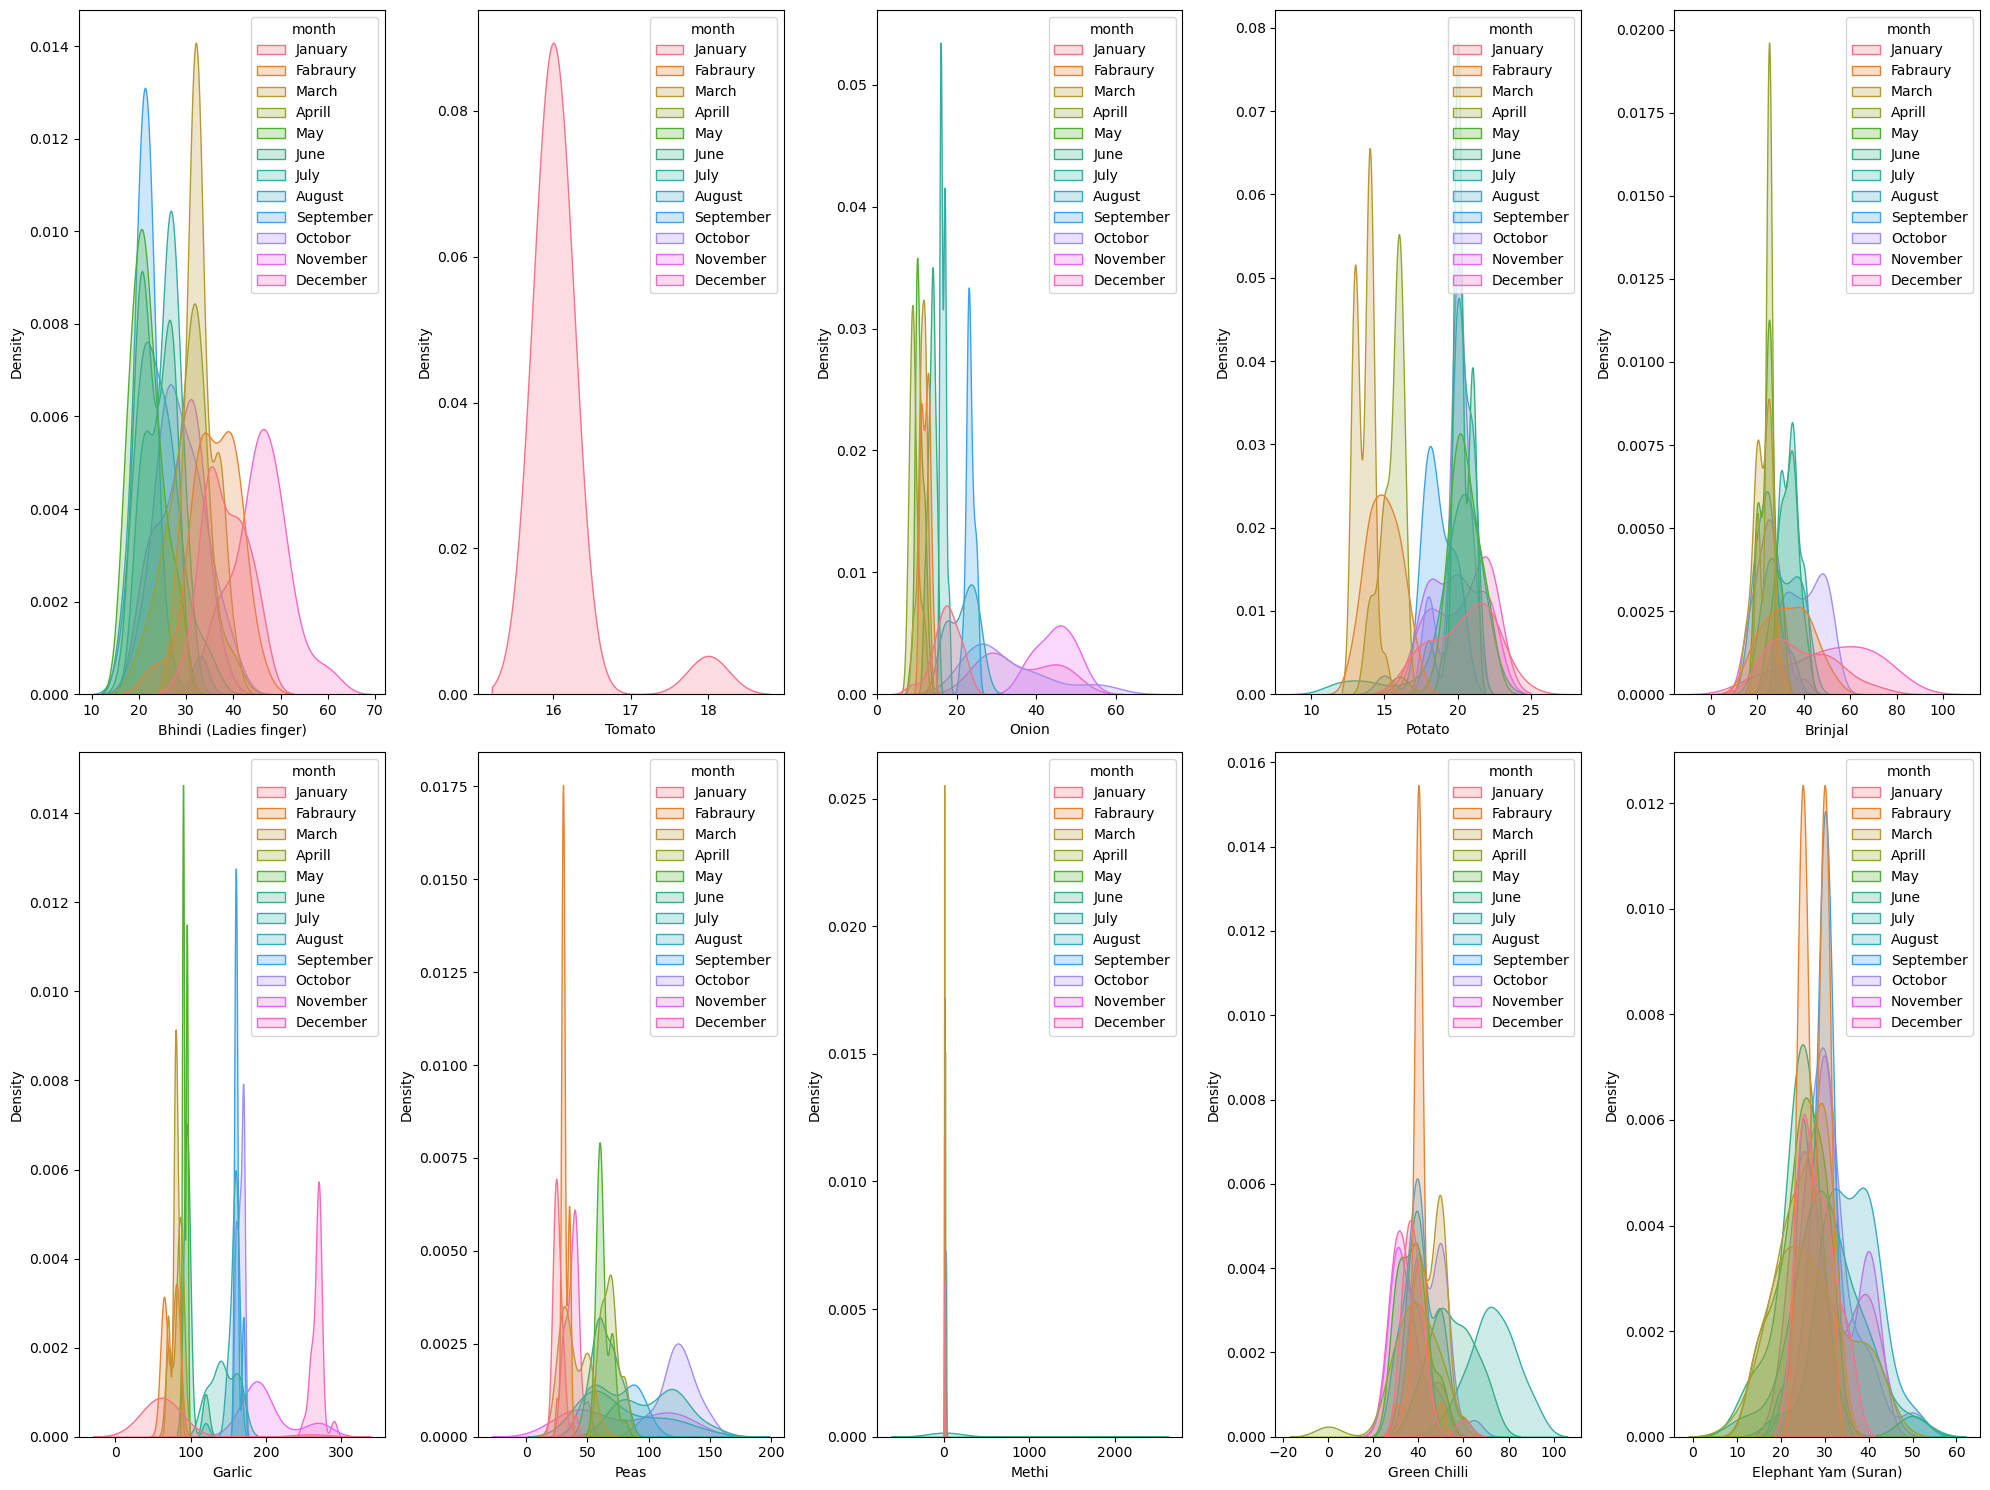

In [46]:
cols = df.columns[1:-1]
index = 0
fig, axes = plt.subplots(2,5,figsize=(20,15))
for i in range(2):
    for j in range(5):
        sns.kdeplot(df, x= cols[index], hue='month', ax=axes[i][j], fill=True, warn_singular=False)
        index += 1
plt.tight_layout()
plt.show()